<a href="https://colab.research.google.com/github/PaulToronto/Practical-Statistics-for-Data-Scientists-Notes/blob/main/4_Regression_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Regression and Prediction

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

## Regression vs. Correlation

- **Correlation** measures the *strength* of an association
- **Regression** quantifies the *nature*  of the relationship

## Simple Linear Regression

### Key Terms

- **Response**: the term we are trying to predict ($Y$)
    - synonyms: dependent variable, Y variable, target, outcome
- **Independent variable**: the variable used to predict the response ($X$)
    - synonyms: X variable, feature, attribute, predictor
- **Record**: the vector of predictor and outcome values for a specific individual or case
    - synonyms: row, case, instance, example
- **Intercept**: the intercept of the regression line
    - that is the predicted value when $X = 0$
    - synonyms: $b_0$, $\beta_0$
- **Regression coefficient**
    - the slope of the regression line
    - synonyms: $b_1$, $\beta_1$
- **Fitted values**
    - the estimates $\hat{Y}_{i}$ obtained from the regression line
    - synonym: predicted values
- **Residuals**
    - the difference between the observed values and the fitted values
    - synonym: errors
- **Least Squares**:
    - the method of fitting a regression by minimizing the sum of squared residuals
    - synonyms: ordinary least squares, OLS


### The Regression Equation

$Y = b_0 + b_1X$

- simple linear regression estimates how much $Y$ will change when $X$ changes by a certain amount.

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Practical-Statistics-for-Data-Scientists-Notes/main'
path += '/data/LungDisease.csv'

lung = pd.read_csv(path)
lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [3]:
lung.shape

(122, 2)

- *Exposure* is the number of years an worker was exposed to cotton dust
 - $X$
- *PEFR (peak expiratory flow rate)* is a measure of lung capacity
  - $Y$

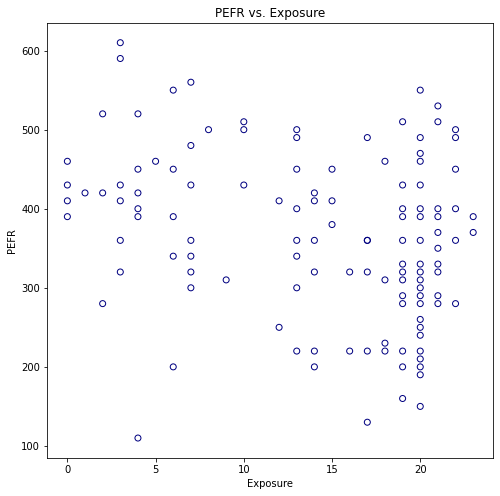

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(lung['Exposure'], 
            lung['PEFR'],
            marker='o', 
            facecolors='none',
            edgecolors='navy');
plt.title('PEFR vs. Exposure')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
 
plt.show()

In [5]:
model = LinearRegression()

predictors = ['Exposure']
outcome = 'PEFR'

model.fit(lung[predictors], lung[outcome])

LinearRegression()

In [6]:
model.intercept_

424.582806573957

In [7]:
model.coef_

array([-4.18457649])

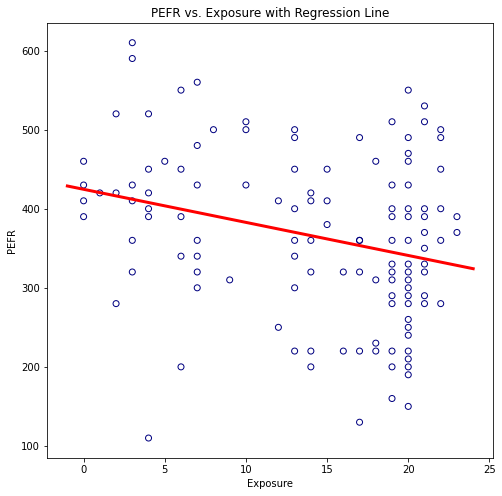

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(lung['Exposure'], 
            lung['PEFR'], 
            marker='o', 
            facecolors='none',
            edgecolors='navy')

# regression line
exposure = np.array([lung['Exposure'].min() - 1, lung['Exposure'].max() + 1])
y_hat = model.intercept_ + model.coef_[0] * exposure
plt.plot(exposure, y_hat, color='red', linewidth=3)

plt.title('PEFR vs. Exposure with Regression Line')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
 
plt.show()

### Fitted values and Residuals

- the fitted values are the predictions
- the residuals are the prediction errors

Because the data doesn't fall exactly on a line, the regression equation should include an explicit error term $e_i$

$Y_i = b_0 + b_1X_i + e_i$

The **fitted values** are denoted by:

$\hat{Y}_i = \hat{b}_0 + \hat{b}_1X_i$

The notation $\hat{b}_0$ and $\hat{b}_1$ indicates that the coefficients are estimated vs. known. 

We compute the **residuals** by subtracting the predicted values from the original data:

$\hat{e}_i = Y_i - \hat{Y}_i$

#### Computing the fitted values and the residuals

In [9]:
fitted = model.predict(lung[predictors])
fitted

array([424.58280657, 424.58280657, 424.58280657, 424.58280657,
       420.39823009, 416.2136536 , 416.2136536 , 416.2136536 ,
       412.02907712, 412.02907712, 412.02907712, 412.02907712,
       412.02907712, 412.02907712, 407.84450063, 407.84450063,
       407.84450063, 407.84450063, 407.84450063, 407.84450063,
       403.65992415, 399.47534766, 399.47534766, 399.47534766,
       399.47534766, 399.47534766, 395.29077118, 395.29077118,
       395.29077118, 395.29077118, 395.29077118, 395.29077118,
       395.29077118, 391.10619469, 386.9216182 , 382.73704172,
       382.73704172, 382.73704172, 374.36788875, 374.36788875,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       365.99873578, 365.99873578, 365.99873578, 365.99873578,
       365.99873578, 365.99873578, 361.81415929, 361.81415929,
       361.81415929, 357.62958281, 357.62958281, 353.44500632,
       353.44500632, 353.44500632, 353.44500632, 353.44

In [10]:
# verify with first principles
fitted - np.array((model.intercept_ + model.coef_[0] * lung[predictors])['Exposure'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [11]:
residuals = lung[outcome] - fitted
residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

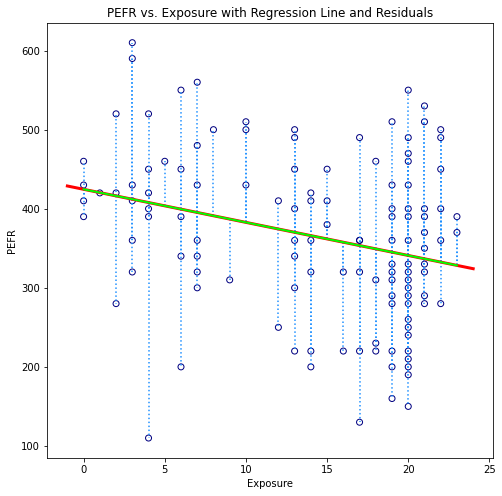

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(lung['Exposure'], 
            lung['PEFR'], 
            marker='o', 
            facecolors='none',
            edgecolors='navy')

# regression line
exposure = np.array([lung['Exposure'].min() - 1, lung['Exposure'].max() + 1])
y_hat = model.intercept_ + model.coef_[0] * exposure
plt.plot(exposure, y_hat, color='red', linewidth=3)
# alternate regression line
plt.plot(lung['Exposure'], fitted, color='lime', linewidth=2)

plt.vlines(lung['Exposure'], 
           fitted, 
           fitted + residuals,
           linestyle='dotted',
           color='dodgerblue')

plt.title('PEFR vs. Exposure with Regression Line and Residuals')
plt.xlabel('Exposure')
plt.ylabel('PEFR')
 
plt.show()


### Least Squares

The regression line is the estimate that minimizes the sum of the squared residual values, aka the **residual sum of squares** or **RSS**

$$
\begin{align}
RSS &= \sum_{i=1}^{n}\left(Y_i - \hat{Y}_i\right)^2 \\
&= \sum_{i=1}^{n}\left(Y_i - \hat{b}_0 - \hat{b}_1X_i\right)^2
\end{align}
$$

- The estimates $\hat{b}_{0}$ and $\hat{b}_{1}$ are the values that minimize $RSS$.

- The method of minimizing the sum of the squared residuals is termed **least squares regression** or **ordinary least squares (OLS) regression**. 

- Least squares regression is sensitive to outliers, which can be a significant problem in small or moderate-sized data sets. 

- Regression is used for:
    1. Prediction
    2. Explanation

## Multiple Linear Regression

Instead of a line, we now have a **linear model**.

$Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + e$

### Key Terms

- **Root mean squared error**: the square root of the average squared error of the regression
    - this is the most widely used metric to compare regression models
    - synonym: RMSE
- **Residual standard error**: the same is the *root mean squared error*, but adjusted for degrees of freedom
    - synonym: RSE
- **R-squared** or $R^2$: the proportion of the variance explained by the model (from 0 to 1)
    - synonym: coefficent of determination
    - can use `sklearn.metrics.r2_score`
- **t-statistic**: the coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model
- **Weighted regression**: regression with records having different weights

### Example: King County Housing Data

- The goal is to predict the sales price from the other variables

In [13]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Practical-Statistics-for-Data-Scientists-Notes/main/'
path += 'data/house_sales.csv'

In [14]:
house = pd.read_csv(path, delimiter='\t')
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 
          'Bathrooms', 'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [15]:
house.shape

(22687, 22)

In [16]:
predictors = subset[1:]
outcome = subset[0]
display(predictors)
display(outcome)

['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']

'AdjSalePrice'

In [17]:
house_lm = LinearRegression()

house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [18]:
house_lm.coef_

array([ 2.28830604e+02, -6.04668207e-02, -1.94428404e+04, -4.77699552e+04,
        1.06106963e+05])

In [19]:
house_lm.intercept_

-521871.36818828376

In [20]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('\nCoefficients:')
for name, coef in list(zip(predictors, house_lm.coef_)):
    print(f'{name}: {coef}')

Intercept: -521871.368

Coefficients:
SqFtTotLiving: 228.83060360240793
SqFtLot: -0.06046682065307607
Bathrooms: -19442.84039832106
Bedrooms: -47769.95518521438
BldgGrade: 106106.96307898081


### Assessing the Model

#### Root Mean Squared Error (RMSE)

- from a data science perspective, this is the most important performance metric
- its the square root of the average squared error in the predicted $\hat{y}_{i}$ values
- it measures overall accuracy of the model
    - and it is a basis for comparing it to other models, ***including models fit using other learning techniques***
- can use  `sklearn.metrics.mean_squared_error` in `scikit-learn`
    - this is the part under the square root sign in the equation for RMSE

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}\left(y_{i} - \hat{y_i}\right)^{2}}{n}}
$$

#### Residual Standard Error (RSE)

- similar to RMSE, the only difference is that the denominator is the **degrees of freedom** as opposed to the number of records
- in practice, for linear regression, the difference between RMSE and RSE is very small, particularly for big data applications
- $p$ is the number of predictors

$$
RSE = \sqrt{\frac{\sum_{i=1}^{n}\left(y_{i} - \hat{y_i}\right)^{2}}{n - p - 1}}
$$

#### R-squared ($R^{2}$)

- aka **coefficient of determination
- ranges from 0 to 1
- measures the proportion of variation in the data that is accounted for in the model
- helps explain how well the model fits the data
- the denominator is proportional to the variance of $Y$

$$
R^{2} = 1 - \frac{\sum_{i=1}^{n}\left(y_i - \hat{y_i}\right)^{2}}{\sum_{i=1}^{n}\left(y_i - \bar{y_i}\right)^2}
$$

In [21]:
fitted = house_lm.predict(house[predictors])
fitted

array([ 424555.81419413, 1135307.41308934,  571696.27428408, ...,
        148421.0806143 ,  346082.70383261,  228913.37004649])

In [22]:
fitted.shape

(22687,)

In [23]:
# mean squared error (scikit-learn)
mean_squared_error(house[outcome], fitted)

68235991549.00575

In [24]:
# mean squared error (from scratch)
sum((house[outcome] - fitted)**2) / len(house)

68235991549.00535

In [25]:
rmse = np.sqrt(mean_squared_error(house[outcome], fitted))
rmse

261220.19743696266

In [26]:
# residual standard error (from scratch)
rse = np.sqrt(sum((house[outcome] - fitted)**2) / (len(house) - len(subset) - 1))
rse

261260.5060858303

In [27]:
# this is needed since statsmodels does
#  not include an intercept automatically
# - `assign` is a pandas method
house[predictors].assign(const=1).head()

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,const
1,2400,9373,3.00,6,7,1
2,3764,20156,3.75,4,10,1
3,2060,26036,1.75,4,8,1
4,3200,8618,3.75,5,7,1
5,1720,8620,1.75,4,7,1


In [28]:
# statsmodels ordinary least squares
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()

In [29]:
# recall these values from scikit-learn
for name, coef in list(zip(predictors, house_lm.coef_)):
    print(f'{name}: {coef}')
house_lm.intercept_

SqFtTotLiving: 228.83060360240793
SqFtLot: -0.06046682065307607
Bathrooms: -19442.84039832106
Bedrooms: -47769.95518521438
BldgGrade: 106106.96307898081


-521871.36818828376

In [30]:
results.params

SqFtTotLiving       228.830604
SqFtLot              -0.060467
Bathrooms        -19442.840398
Bedrooms         -47769.955185
BldgGrade        106106.963079
const           -521871.368188
dtype: float64

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:48:36   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

In [32]:
# r2_score (scikit-learn)
r2 = r2_score(house[outcome], fitted)
r2

0.5405875253381902

In [33]:
# r2 from scratch
1 - sum((house[outcome] - fitted)**2) / \
sum((house[outcome] - house[outcome].mean())**2)

0.5405875253381933

#### t-statistic

$$
$$